## Download dataset from Kaggle via Kagglehub

In [39]:
# pip install kagglehub

In [40]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("mahdimashayekhi/mental-health")

# print("Path to dataset files:", path)

## Import dataset and pre-processing

In [41]:
import pandas as pd

data = pd.read_csv('mental_health_dataset.csv')
data.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [42]:
# make a copy to preserve the original data, and use the 'data' dataframe for the following operations.

original_data = data.copy()
original_data.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [43]:
data.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

In [44]:
data.describe().round(1)

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,41.6,5.6,6.5,3.5,15.0,10.6,50.1,77.3
std,13.7,2.9,1.5,2.3,9.0,6.3,29.2,14.1
min,18.0,1.0,3.0,0.0,0.0,0.0,0.0,42.8
25%,30.0,3.0,5.5,2.0,7.0,5.0,25.0,65.8
50%,41.5,6.0,6.5,4.0,15.0,11.0,50.0,77.6
75%,53.0,8.0,7.5,5.0,23.0,16.0,76.0,89.2
max,65.0,10.0,10.0,7.0,30.0,21.0,100.0,100.0


In [45]:
data.describe(include='object')

,gender,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk
count,10000,10000,10000,10000,10000,10000
unique,4,4,3,2,2,3
top,Male,Employed,On-site,No,No,Medium
freq,4557,5868,5044,6969,6012,5892


In [46]:
categorical_columns = ['gender', 'employment_status', 'work_environment','mental_health_history', 'seeks_treatment', 'mental_health_risk']

for col in categorical_columns:
    print(data[col].value_counts(normalize=True).round(2))
    print('\n')

gender
Male                 0.46
Female               0.45
Non-binary           0.05
Prefer not to say    0.05
Name: proportion, dtype: float64


employment_status
Employed         0.59
Student          0.20
Self-employed    0.10
Unemployed       0.10
Name: proportion, dtype: float64


work_environment
On-site    0.50
Remote     0.30
Hybrid     0.19
Name: proportion, dtype: float64


mental_health_history
No     0.7
Yes    0.3
Name: proportion, dtype: float64


seeks_treatment
No     0.6
Yes    0.4
Name: proportion, dtype: float64


mental_health_risk
Medium    0.59
High      0.24
Low       0.17
Name: proportion, dtype: float64




In [47]:
data.isna().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

In [48]:
# drop categorical and oridinal features as K-Means only work well with numeric features
# Note: 'mental_health_risk' which is a categorical label is kept just for future comparison (will not be used as features) 

data = data.drop(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level'], axis =1)

In [49]:
data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,6.2,3,28,17,54,59.7,High
1,9.0,4,30,11,85,54.9,High
2,7.7,2,24,7,62,61.3,Medium
3,4.5,4,6,0,95,97.0,Low
4,5.4,0,24,12,70,69.0,High


In [50]:
data.dtypes

sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

In [51]:
data['mental_health_risk'].value_counts()

mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64

## Examine the correlation and skewness of relevent variables

#### correlation check

In [52]:
numerical_columns = data.columns.difference(['mental_health_risk'])
numerical_columns = numerical_columns.to_list()  #convert numerical_columns to list type for eaiser future column selection oprations

# Plot the correlation matrix (only include numerical columns)
corr_mat = data[numerical_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(numerical_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,anxiety_score,depression_score,physical_activity_days,productivity_score,sleep_hours,social_support_score
anxiety_score,0.000000,0.011036,-0.001656,-0.009134,-0.004457,-0.018487
depression_score,0.011036,0.000000,0.009416,-0.939149,0.005076,0.002559
physical_activity_days,-0.001656,0.009416,0.000000,-0.010163,-0.000870,-0.009611
productivity_score,-0.009134,-0.939149,-0.010163,0.000000,-0.009230,0.001069
sleep_hours,-0.004457,0.005076,-0.000870,-0.009230,0.000000,0.002663
social_support_score,-0.018487,0.002559,-0.009611,0.001069,0.002663,0.000000


In [53]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

anxiety_score             social_support_score
depression_score            productivity_score
physical_activity_days      productivity_score
productivity_score            depression_score
sleep_hours                 productivity_score
social_support_score             anxiety_score
dtype: object

In [54]:
corr_mat.abs().max()

anxiety_score             0.018487
depression_score          0.939149
physical_activity_days    0.010163
productivity_score        0.939149
sleep_hours               0.009230
social_support_score      0.018487
dtype: float64

#### skewness check

In [55]:
skew_columns = (data[numerical_columns]
                .skew()
                .sort_values(ascending=False))
skew_columns

depression_score          0.001152
sleep_hours              -0.001903
physical_activity_days   -0.003336
social_support_score     -0.004376
anxiety_score            -0.023548
productivity_score       -0.079468
dtype: float64

In [56]:
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Series([], dtype: float64)

since there's no skew features, there's no need to perform log transformation.

## Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[numerical_columns] = sc.fit_transform(data[numerical_columns])

data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,High
1,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,High
2,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,Medium
3,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,Low
4,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,High


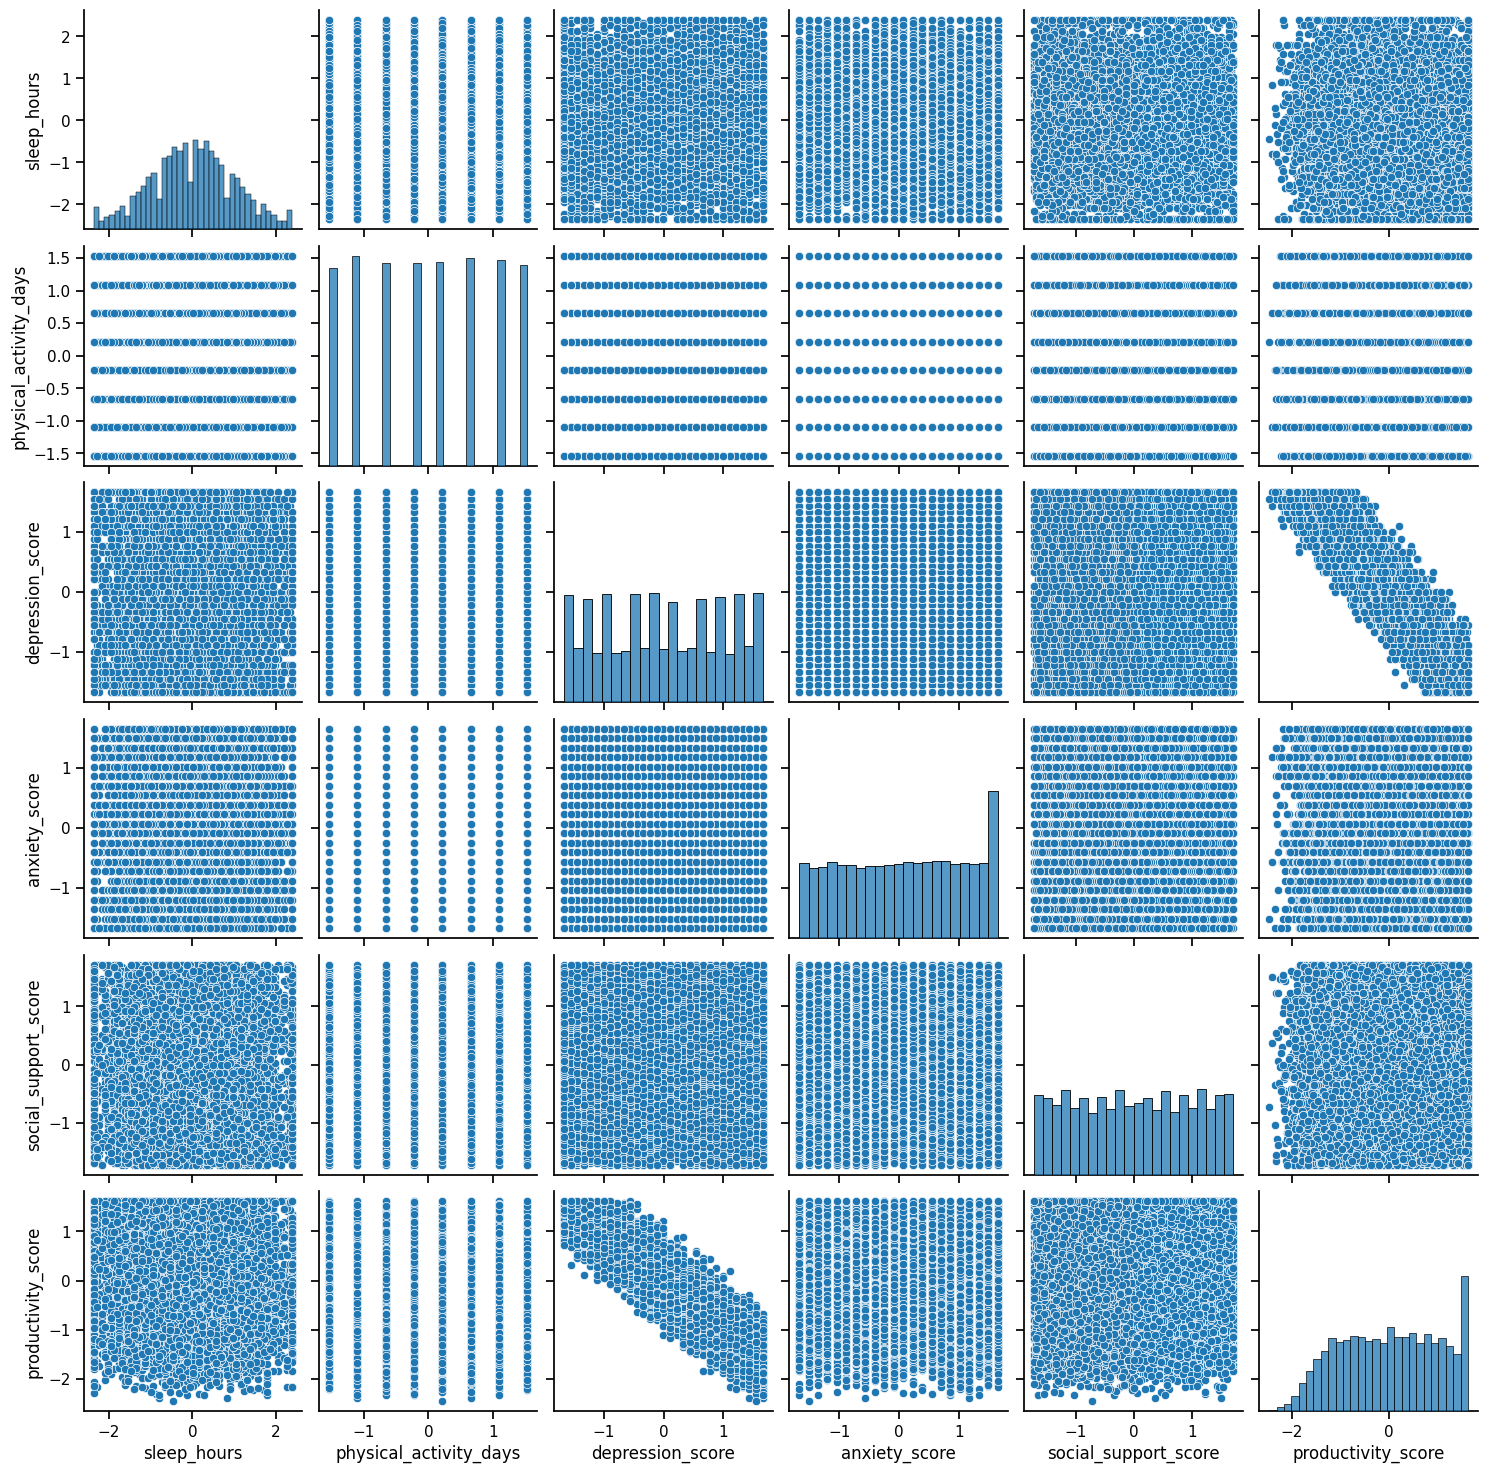

In [58]:
import seaborn as sns

sns.set_context('notebook')
sns.pairplot(data)

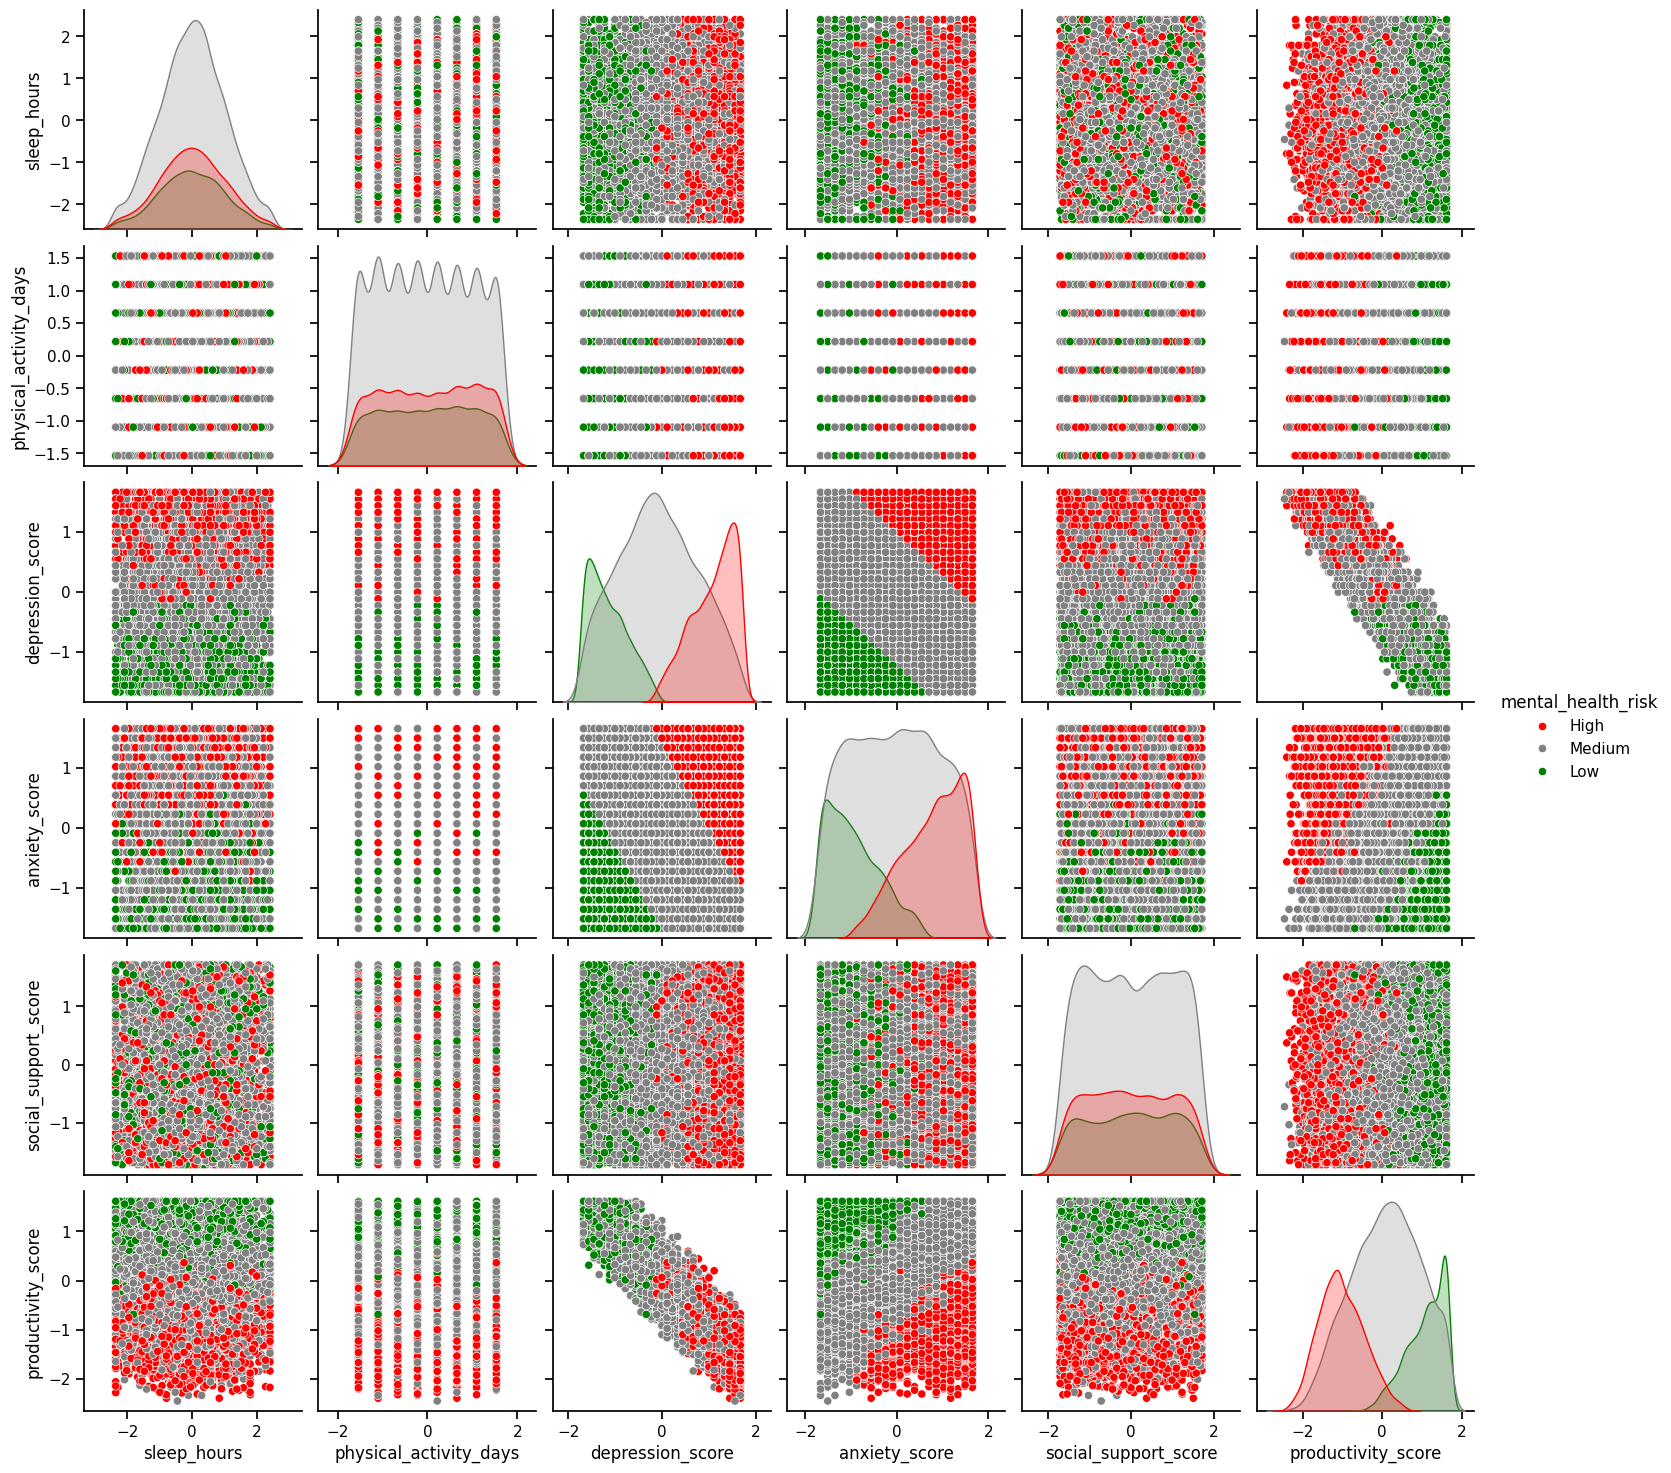

In [59]:
sns.set_context('notebook')
sns.pairplot(data, 
             hue='mental_health_risk', 
             hue_order=['High', 'Medium', 'Low'],
             palette={'High':'red', 'Medium':'gray', 'Low': 'green'})

## Convert 'mental_health_risk' from categorical into ordinal and save as 'risk'

The operation below, I converted the 'mental_health_risk' into a ordinal variable named 'risk': 'High': 3, 'Medium': 2, 'Low': 1 
So we can check the mean 'risk' of 6 clusters and see if the clustering somewhat refelct the risk of mental risk.

Note: In practice, the scale of High/Medium/Low of mental health risk not nesessary equal to my setting, this setting is just for examine the clustering results purpose.

In [60]:
data['risk'] = data['mental_health_risk'].replace({'High': 3, 'Medium': 2, 'Low': 1})

C:\Users\ych22\AppData\Local\Temp\ipykernel_23120\2463141304.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['risk'] = data['mental_health_risk'].replace({'High': 3, 'Medium': 2, 'Low': 1})


In [61]:
numerical_columns

['anxiety_score',
 'depression_score',
 'physical_activity_days',
 'productivity_score',
 'sleep_hours',
 'social_support_score']

In [62]:
# Note: 'productivity_score' was dropped due to it's collinearity with depression_score
numerical_columns.remove('productivity_score')
numerical_columns

['anxiety_score',
 'depression_score',
 'physical_activity_days',
 'sleep_hours',
 'social_support_score']

# K-Means

In [63]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3, random_state=42)
km = km.fit(data[numerical_columns])

data['kmeans'] = km.predict(data[numerical_columns])

In [64]:
data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,risk,kmeans
0,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,High,3,0
1,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,High,3,0
2,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,Medium,2,0
3,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,Low,1,1
4,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,High,3,0


In [65]:
data[numerical_columns + ['risk', 'kmeans']].groupby('kmeans').mean()

,anxiety_score,depression_score,physical_activity_days,sleep_hours,social_support_score,risk
kmeans,,,,,,
0,0.088088,0.950786,0.106080,-0.003349,0.569542,2.518080
1,-0.161081,-0.870396,-0.089463,0.022823,0.702346,1.621114
2,0.058660,-0.074842,-0.014586,-0.015847,-1.042688,2.047795


In [66]:
(data[['mental_health_risk','kmeans']]
 .groupby(['kmeans','mental_health_risk'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans mental_health_risk        
0      High                  1619
       Medium                1506
1      High                     4
       Low                   1174
       Medium                1910
2      High                   746
       Low                    565
       Medium                2476

## Find the best k value

### method 1: Elbow method

In [67]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[numerical_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

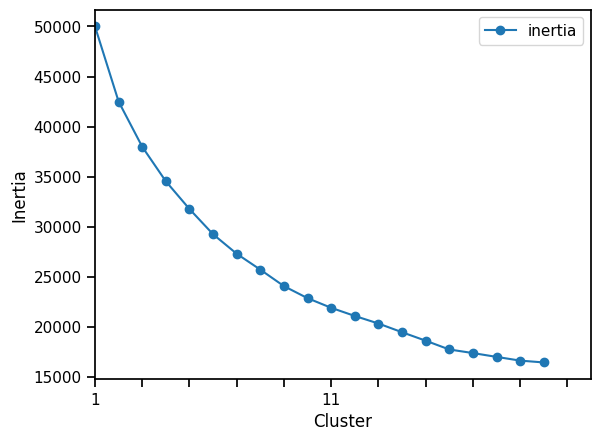

In [68]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia')

### method 2: silhouette score

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

best_k = 0
best_score = -1
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[numerical_columns])
    score = silhouette_score(data[numerical_columns], labels)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K: {best_k} with silhouette score: {best_score}")


Best K: 16 with silhouette score: 0.1769965546745464


### fit the K-means model with the best value of k

In [90]:
km = KMeans(n_clusters=16, random_state=42)
km = km.fit(data[numerical_columns])

data['kmeans'] = km.predict(data[numerical_columns])


In [91]:
data[numerical_columns + ['risk', 'kmeans']].groupby('kmeans').mean()

,anxiety_score,depression_score,physical_activity_days,sleep_hours,social_support_score,risk
kmeans,,,,,,
0,0.826962,0.735550,0.889914,-0.694719,0.798787,2.677469
1,-0.849452,-0.770938,-0.823154,0.773728,0.810936,1.437014
2,0.847658,-0.859114,-0.887868,0.538893,-0.829025,1.975806
3,-0.816285,-0.793970,-0.798736,-0.714468,-0.820571,1.430442
4,0.719737,-0.826732,0.713921,0.860716,0.841781,1.960396
5,-0.872152,0.852811,-0.836129,-0.685340,0.749607,2.125796
6,-0.816391,0.806916,0.812955,0.717308,0.798669,2.152648
7,-0.766978,0.867241,0.771558,-0.693079,-0.830534,2.164835
8,0.887175,-0.890477,0.810423,-0.680606,-0.775595,1.959627


# Agglomerative clustering

### find the best value of K

#### method 1: dendrogram

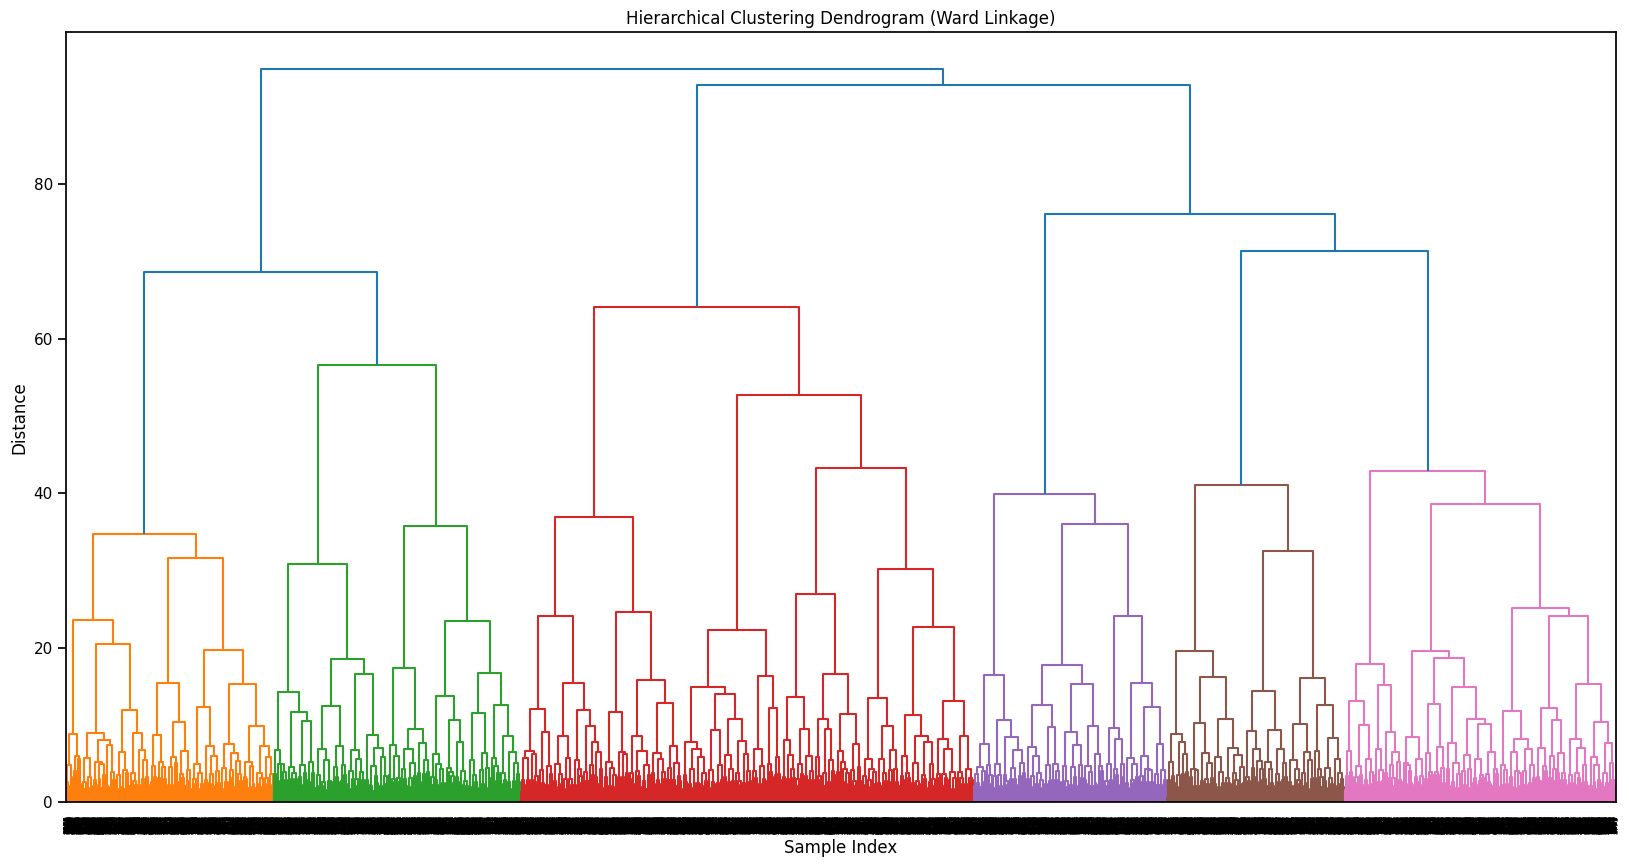

In [92]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 1: Compute the linkage matrix using Ward's method
Z = linkage(data[numerical_columns], method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


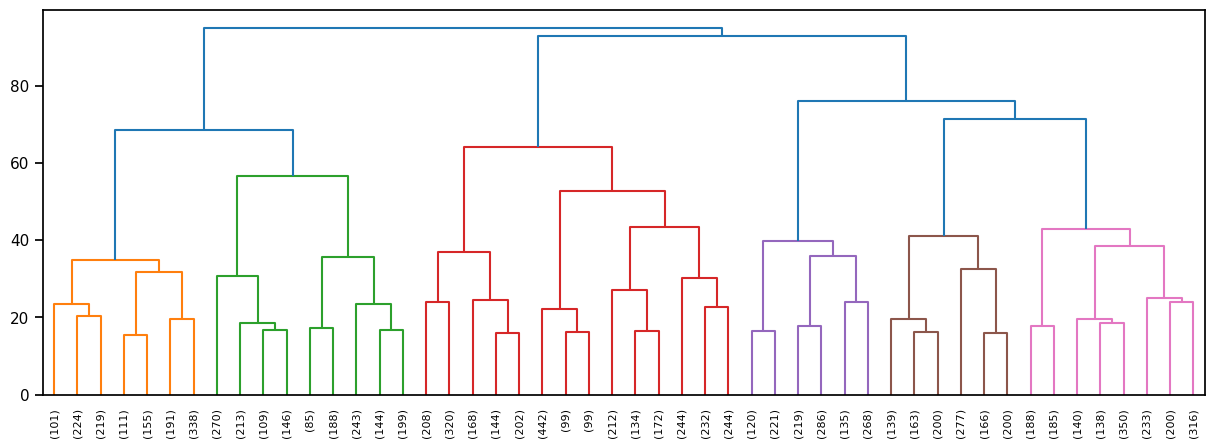

In [95]:
from scipy.cluster import hierarchy

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top', 
                           p=50, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

#### method 2: silhouette score

In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 24):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(data[numerical_columns])
    score = silhouette_score(data[numerical_columns], labels)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal K: {best_k} with silhouette score: {best_score}")


Optimal K: 2 with silhouette score: 0.09207105532241483


### fit agglomerative model with the best k

In [76]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[numerical_columns])
data['agglom'] = ag.fit_predict(data[numerical_columns])

In [77]:
data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,risk,kmeans,agglom
0,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,High,3,0,0
1,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,High,3,0,0
2,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,Medium,2,0,0
3,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,Low,1,1,0
4,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,High,3,0,0


In [78]:
data[numerical_columns + ['risk', 'agglom']].groupby('agglom').mean()

,anxiety_score,depression_score,physical_activity_days,sleep_hours,social_support_score,risk
agglom,,,,,,
0,0.207059,-0.076791,-0.350726,0.003124,0.124048,2.101784
1,-0.498183,0.184759,0.843845,-0.007517,-0.298458,1.969687


In [79]:
(data[['mental_health_risk','agglom']]
 .groupby(['mental_health_risk','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
mental_health_risk agglom        
High               0         1709
                   1          660
Low                0          990
                   1          749
Medium             0         4365
                   1         1527

# Mean shift

In [80]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data[numerical_columns])
bandwidth

np.float64(2.6254547105413115)

In [81]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(data[numerical_columns])

,bandwidth,np.float64(2.6254547105413115)
,seeds,None
,bin_seeding,True
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [82]:
print(f"Number of clusters: {len(ms.cluster_centers_)}")

Number of clusters: 1


In [83]:
data['cluster']=ms.labels_

In [84]:
data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,risk,kmeans,agglom,cluster
0,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,High,3,0,0,0
1,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,High,3,0,0,0
2,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,Medium,2,0,0,0
3,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,Low,1,1,0,0
4,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,High,3,0,0,0


In [85]:
data[numerical_columns + ['cluster']].groupby('cluster').mean()

,anxiety_score,depression_score,physical_activity_days,sleep_hours,social_support_score
cluster,,,,,
0,1.078027e-17,6.290524e-17,-4.583001e-17,6.990776e-16,2.392531e-17


Getting only 1 cluster usually means the bandwidth is too large, so the algorithm sees all your data points as part of one big neighborhood.


### Try manually setting a smaller bandwidth. 


In [86]:
# Try a smaller bandwidth manually
ms = MeanShift(bandwidth=2, bin_seeding=True)
ms.fit(data[numerical_columns])

data['cluster'] = ms.labels_
print(f"Number of clusters: {len(ms.cluster_centers_)}")


Number of clusters: 1


In [87]:
# Try a smaller bandwidth manually
ms = MeanShift(bandwidth=1.5, bin_seeding=True)
ms.fit(data[numerical_columns])

data['cluster'] = ms.labels_
print(f"Number of clusters: {len(ms.cluster_centers_)}")

Number of clusters: 3


In [88]:
data.head()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk,risk,kmeans,agglom,cluster
0,-0.185227,-0.221543,1.441550,1.018328,0.132829,-1.252602,High,3,0,0,0
1,1.714534,0.216549,1.664010,0.069310,1.193462,-1.593984,High,3,0,0,2
2,0.832502,-0.659636,0.996631,-0.563369,0.406541,-1.138808,Medium,2,0,0,2
3,-1.338653,0.216549,-1.005507,-1.670557,1.535602,1.400220,Low,1,1,0,2
4,-0.728015,-1.535821,0.996631,0.227480,0.680253,-0.591175,High,3,0,0,1


In [89]:
data[numerical_columns + ['risk', 'cluster']].groupby('cluster').mean()

,anxiety_score,depression_score,physical_activity_days,sleep_hours,social_support_score,risk
cluster,,,,,,
0,0.434276,0.235151,0.389607,-0.080530,-0.792921,2.316474
1,0.301997,-0.659440,-0.722164,-0.017852,0.348779,1.867251
2,-0.803933,0.427574,0.320030,0.109078,0.524012,1.983830
